In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def filter_years(df):
    df = df.T.reset_index()
    df.columns = [df.iloc[0]]
    df = df[1:-1]
    for i in df.columns:
        df[i] = df[i].astype(float)
    df = df.loc[df[df.columns[0]] % 52 == 0]
    return df.reset_index(drop=True)

# Human cases

In [137]:
human_cases_df = pd.read_csv("human_cases.txt", delimiter="\t")

In [138]:
human_cases_df = human_cases_df.T
human_cases_df = human_cases_df[1:-1]
human_cases_df[human_cases_df.columns[0]] = human_cases_df[human_cases_df.columns[0]].astype(float)

In [139]:
# total = 0
# years = []
# for index, row in human_cases_df.iterrows():
#     total += row[human_cases_df.columns[0]]
#     if (float(index) % 52 == 0):
#         years.append(total)
#         total = 0
# years = np.array(years)

In [143]:
vlaanderen = np.array([78970, 67260, 71246])

In [144]:
vlaanderen_avg = np.mean(vlaanderen)

In [145]:
model_avg = human_cases_df[human_cases_df.columns[0]].mean()

In [146]:
model_avg/vlaanderen_avg *100

32.01588846039547

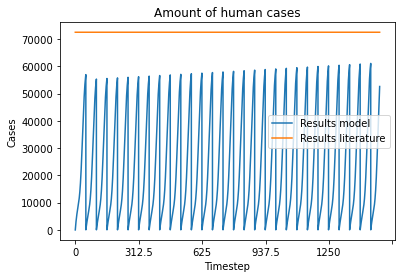

In [163]:
human_cases_df.plot(y=human_cases_df.columns[0], use_index=True) 
plt.plot([vlaanderen_avg]* human_cases_df.shape[0])
plt.xlabel('Timestep'); plt.ylabel('Cases')
plt.title('Amount of human cases')
plt.legend(["Results model", "Results literature"])
plt.savefig('human_cases.png', dpi=300,  bbox_inches='tight')
plt.show()

# Chickens
$41,9$-$58.1\%$

In [10]:
chickens_df = pd.read_csv("chickens.txt", delimiter="\t")
chickens_yr_df = filter_years(chickens_df)

In [11]:
chickens_yr_df[chickens_yr_df.columns[1]] = chickens_yr_df[chickens_yr_df.columns[1]]  * 100

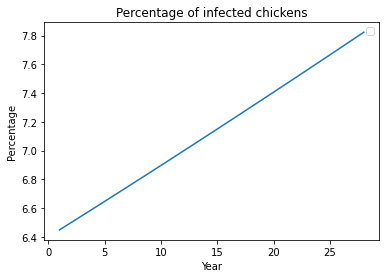

In [12]:
chickens_yr_df[1:].plot(y=chickens_yr_df.columns[1], use_index=True) 
plt.xlabel('Year'); plt.ylabel('Percentage')
plt.title('Percentage of infected chickens')
plt.legend('')
plt.savefig('chickens.png', dpi=300,  bbox_inches='tight')
plt.show()

In [13]:
chickens_avg = chickens_yr_df[chickens_yr_df.columns[1]].mean()

In [14]:
chickens_avg

6.882743793103447

# Source
$20$-$60\%$ from enviro

In [111]:
env_inf_df = pd.read_csv("environment_infection.txt", delimiter="\t")
env_inf_df  = env_inf_df .T
env_inf_df  = env_inf_df [1:-1]
env_inf_df [env_inf_df .columns[0]] = env_inf_df [env_inf_df.columns[0]].astype(float)

In [113]:
env_inf_df

,0
0,1020.00
0.0625,1040.18
0.125,1031.84
0.1875,1022.89
0.25,1013.96
...,...
1499.75,1406.16
1499.81,1398.83
1499.88,1391.48
1499.94,1384.11


In [114]:
cases_env_yr_df = pd.concat([human_cases_df, env_inf_df], axis = 1, join="inner")

In [116]:
cases_env_yr_df

,0,0
0,0.000,1020.00
0.0625,63.750,1040.18
0.125,128.761,1031.84
0.1875,193.252,1022.89
0.25,257.184,1013.96
...,...,...
1499.75,52188.300,1406.16
1499.81,52290.700,1398.83
1499.88,52392.600,1391.48
1499.94,52494.000,1384.11


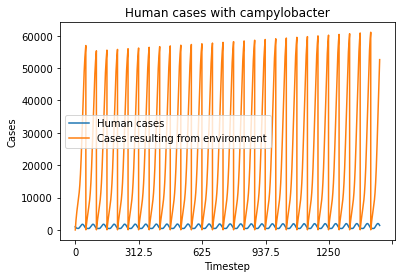

In [164]:
ax = env_inf_df.plot(y=env_inf_df.columns[0], use_index=True) 
human_cases_df.plot(y=human_cases_df.columns[0], use_index=True, ax = ax) 
plt.xlabel('Timestep'); plt.ylabel('Cases')
plt.title('Human cases with campylobacter')
plt.legend(["Human cases", "Cases resulting from environment"])
plt.savefig('source.png', dpi=300,  bbox_inches='tight')
plt.show()

In [151]:
cases_env_yr_df["percentage"] =  (cases_env_yr_df .iloc[:, 1]/cases_env_yr_df .iloc[:, 0]) * 100

In [155]:
cases_env_yr_df.head(10)

,0,0,percentage
0,0.000,1020.000,inf
0.0625,63.750,1040.180,1631.654902
0.125,128.761,1031.840,801.360660
0.1875,193.252,1022.890,529.303707
0.25,257.184,1013.960,394.254697
0.3125,320.561,1005.110,313.547188
0.375,383.389,996.391,259.890346
0.4375,445.679,987.795,221.638219
0.5,507.441,979.326,192.993077
0.5625,568.684,970.986,170.742627


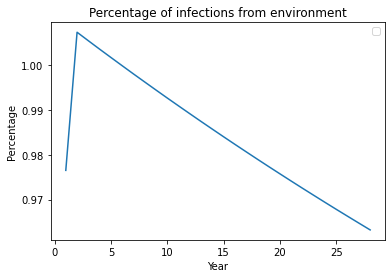

In [19]:
cases_env_yr_df[1:].plot(y="percentage", use_index=True) 
plt.xlabel('Year'); plt.ylabel('Percentage')
plt.title('Percentage of infections from environment')
plt.legend('')
plt.savefig('source.png', dpi=300,  bbox_inches='tight')
plt.show()

# DALYs

In [20]:
dalys_df = pd.read_csv("dalys.txt", delimiter="\t")
dalys_yr_df = filter_years(dalys_df)

In [21]:
dalys_yr_df["diff"] = dalys_yr_df.diff().iloc[:, -1]
vlaanderen_dalys = np.array([3.573, 3.074, 3.201])
vlaanderen_dalys_avg = np.mean(vlaanderen_dalys)

In [22]:
vlaanderen_dalys_avg = vlaanderen_dalys_avg  * 100 

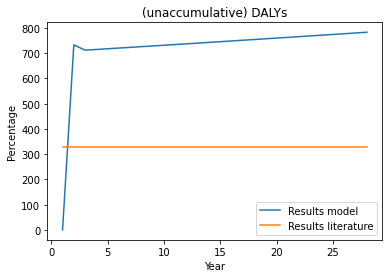

In [23]:
dalys_yr_df[1:].plot(y="diff", use_index=True)
plt.plot(np.arange(1, dalys_yr_df.shape[0]), [vlaanderen_dalys_avg] * (dalys_yr_df.shape[0] - 1))
plt.xlabel('Year'); plt.ylabel('Percentage')
plt.title('(unaccumulative) DALYs')
plt.legend(["Results model", "Results literature"])
plt.savefig('dalys.png', dpi=300,  bbox_inches='tight')
plt.show()

# CoI

In [166]:
def filter_years_coi(df):
    df = df.T.reset_index()
    df.columns = [df.iloc[0]]
    df = df[1:-1]
    df[df.columns[1]] = df[df.columns[1]].str.extract(r'(\d+)', expand=False)
    for i in df.columns:
        df[i] = df[i].astype(float)
    df = df.loc[df[df.columns[0]] % 52 == 0]
    return df.reset_index(drop=True)

In [167]:
coi_df = pd.read_csv("coi.txt", delimiter="\t")
coi_yr_df = filter_years_coi(coi_df)

In [168]:
coi_yr_df["diff"] = coi_yr_df.diff().iloc[:, -1]

In [169]:
vlaanderen_coi = np.array([64, 55, 64])
vlaanderen_coi_avg = np.mean(vlaanderen_coi)

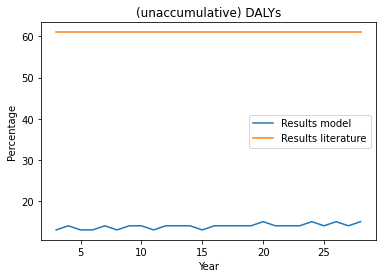

In [181]:
coi_yr_df.plot(y="diff", use_index=True)
plt.plot(np.arange(3, coi_yr_df.shape[0]), [vlaanderen_coi_avg] * (coi_yr_df.shape[0] - 3))
plt.xlabel('Year'); plt.ylabel('Percentage')
plt.title('(unaccumulative) DALYs')
plt.legend(["Results model", "Results literature"])
plt.savefig('coi.png', dpi=300,  bbox_inches='tight')
plt.show()